# **Moments, Sorting, Approximating & Matching Contours**

####**In this lesson we'll learn:**
1. Sort Contours by Area (영역별로 윤곽선을 찾자)
2. Sort by Left to Right (Great for OCR) 
3. Approximate Contours(윤곽선을 근사하자)
4. Convex Hull

In [1]:
#라이브러리 임포트
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 보여주는 함수 정의 
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# 이미지 압축 풀기 및 다운로드
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-22 01:25:31--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.86
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.8MB/s    in 2.0s    

2022-09-22 01:25:34 (13.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



### **Finding Contours as per usual**
일단 윤곽선(등고선)을 찾자

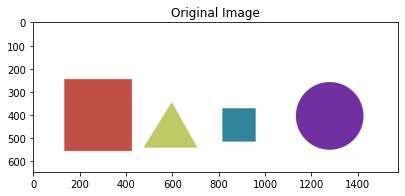

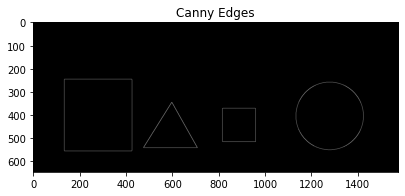

Number of contours found =  4
(array([[[817, 370]],

       [[816, 371]],

       [[815, 371]],

       ...,

       [[820, 370]],

       [[819, 370]],

       [[818, 370]]], dtype=int32), array([[[596, 345]],

       [[596, 346]],

       [[595, 347]],

       ...,

       [[599, 346]],

       [[598, 345]],

       [[597, 345]]], dtype=int32), array([[[1262,  258]],

       [[1261,  259]],

       [[1260,  259]],

       ...,

       [[1265,  258]],

       [[1264,  258]],

       [[1263,  258]]], dtype=int32), array([[[135, 245]],

       [[135, 246]],

       [[134, 247]],

       ...,

       [[138, 245]],

       [[137, 245]],

       [[136, 245]]], dtype=int32))


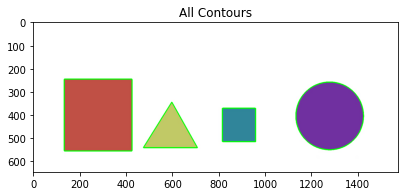

In [3]:
# 이미지 로드
image = cv2.imread('images/bunchofshapes.jpg')
imshow('Original Image', image)
# 회색이미지로 바꾸고
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# canny를 사용한 엣지를 찾아준다.
edged = cv2.Canny(gray, 50, 200) #threshold가 클수록 엣지 검출이 어렵고 작을 수록 쉽다.
imshow('Canny Edges', edged)

# canny에서 추출된 엣지를 이용하여 contour를 찾아준다
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_NONE)
   #cv2.findContours(이미지, 외곽검출 모드, 외각 근사화 방법)
print("Number of contours found = ", len(contours))
print(contours)
#contour들을 그려보자 원래 이미지 위에서
cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow('All Contours', image)

## **Sorting by Area using cv2.ContourArea and cv2.Moments**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/moments.png)

Contor Areas before sorting...
[20587.5, 22901.5, 66579.5, 90222.0]
Contor Areas after sorting...
[90222.0, 66579.5, 22901.5, 20587.5]
{'m00': 90222.0, 'm10': 25262160.0, 'm01': 36043689.0, 'm20': 7714377697.0, 'm11': 10092232920.0, 'm02': 15117233610.0, 'm30': 2518970577480.0, 'm21': 3081893889951.5, 'm12': 4232825410800.0, 'm03': 6612840930940.5, 'mu20': 640972897.0, 'mu11': 0.0, 'mu02': 717779854.5, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.07874350932988444, 'nu11': 0.0, 'nu02': 0.08817924273266713, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
{'m00': 66579.5, 'm10': 85028799.16666666, 'm01': 26845687.166666664, 'm20': 108943070556.91666, 'm11': 34284686431.958332, 'm02': 11177394386.916666, 'm30': 140032111521960.56, 'm21': 43927230338982.85, 'm12': 14274669053677.85, 'm03': 4791441150778.55, 'mu20': 352638250.7964325, 'mu11': 11080.150943756104, 'mu02': 352877539.38054466, 'mu30': 10334733.71875, 'mu21': -6654550.243469238, 'mu12': -10351248.535644531, 

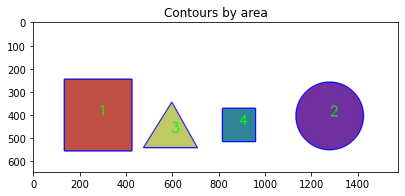

In [6]:
import cv2
import numpy as np

# 컨투어 별로 넓이를 알려주는 함수를 작성

def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt) #컨투어의 넓이를 알려준다.
        all_areas.append(area)
    return all_areas

# 이미지 로드
image = cv2.imread('images/bunchofshapes.jpg')

# 분류하기 전에 컨투어 별로 넓이를 확인해보자.(작은 순으로 나온다)
print("Contor Areas before sorting...")
print(get_contour_areas(contours))

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
   #sorted(정렬할 데이터, key 파라미터, reverse 파라미터)
   #컨투어라는 데이터를 cv2.contourArea를 기준으로 분류하는데 큰->작 순으로 분류한다.
print("Contor Areas after sorting...") 
print(get_contour_areas(sorted_contours))

# 컨투어의 중심점을 찾고 컨투어를 그려보자
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    print(M) #다양한 모멘트 값을 준다. 이를이용해 컨투어의 중심을 구하는데
    cx = int(M['m10'] / M['m00']) 
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contours by area', image)

#### **사용될 함수를 정의하자**

In [7]:
# Functions we'll use for sorting by position

# 컨투어의 중심이될 좌표를 찾아주는 함수
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

#컨투어의 중심을 찾아줄 함수    
def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

#### **We use Moments to Calculate the Center and then use the X Cordinate to sort from left to right**

모멘트를 사용해서 중심을 계산한뒤에 정의된 함수(X Cordinate)를 사용하여 왼쪽에서 오른쪽으로 분류를 해보자

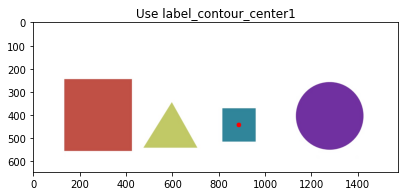

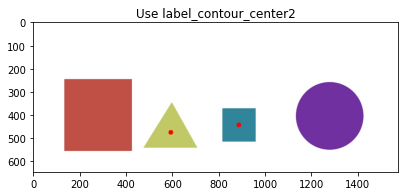

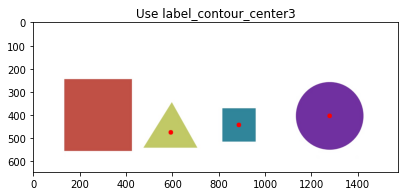

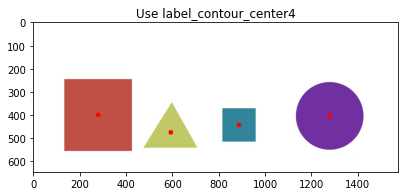

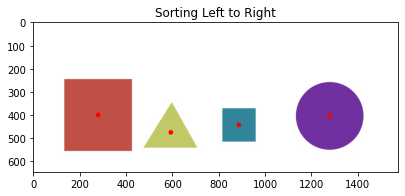

[array([[[135, 245]],

       [[135, 246]],

       [[134, 247]],

       ...,

       [[138, 245]],

       [[137, 245]],

       [[136, 245]]], dtype=int32), array([[[596, 345]],

       [[596, 346]],

       [[595, 347]],

       ...,

       [[599, 346]],

       [[598, 345]],

       [[597, 345]]], dtype=int32), array([[[817, 370]],

       [[816, 371]],

       [[815, 371]],

       ...,

       [[820, 370]],

       [[819, 370]],

       [[818, 370]]], dtype=int32), array([[[1262,  258]],

       [[1261,  259]],

       [[1260,  259]],

       ...,

       [[1265,  258]],

       [[1264,  258]],

       [[1263,  258]]], dtype=int32)]


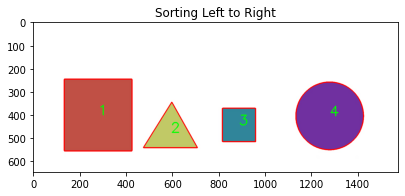

In [16]:
# 이미지 로드
image = cv2.imread('images/bunchofshapes.jpg')
orginal_image = image.copy()

# Computer Center of Mass or centroids and draw them on our image
# 정의한 label_contour_center함수를 사용하면 컨투어 중심에 점을 찍어준다
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
    imshow('Use label_contour_center' + str(i+1), orig)  # 이제 컨투어의 중심을 바로 표현해 줄 수 있다.image 에서 컨투어만 찾아준다면!

# Showing the Contour centers
imshow("Sorting Left to Right", image)

# Sort by left to right using our x_cord_contour function
# 왼쪽에서 오른 쪽으로 정렬하기 위해 컨투어의 중심 좌표 중에서도 x좌표 기준으로 분류를 해준다.
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)
print(contours_left_to_right)
# Labeling Contours left to right
# 분류가 된 컨투어를 순서대로 라벨링 해주자.
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    (x, y, w, h) = cv2.boundingRect(c)  

imshow('Sorting Left to Right', orginal_image)

## **Approximating Contours using ApproxPolyDP**

### **Using 'ApproxPolyDP' to approximate contours as a more defined shape**
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.


***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


ApproxPolyDP를 사용하여 컨투어를 근사시켜보자

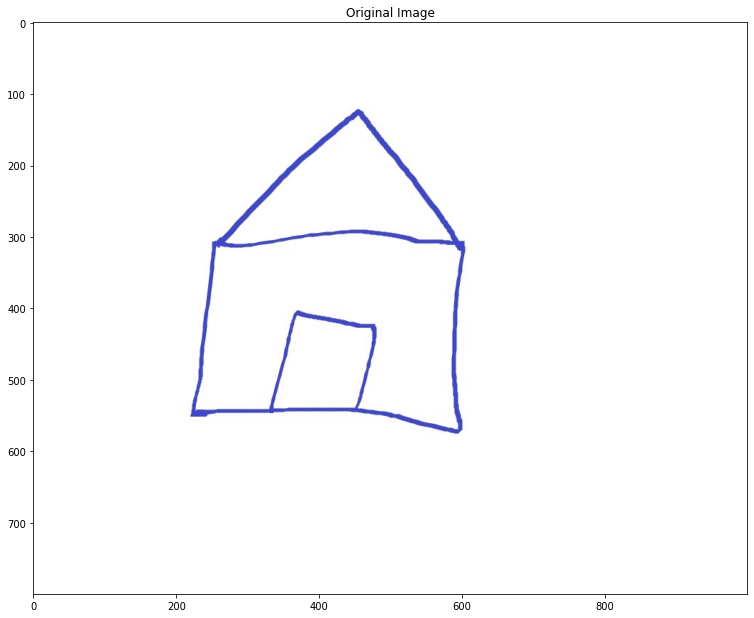

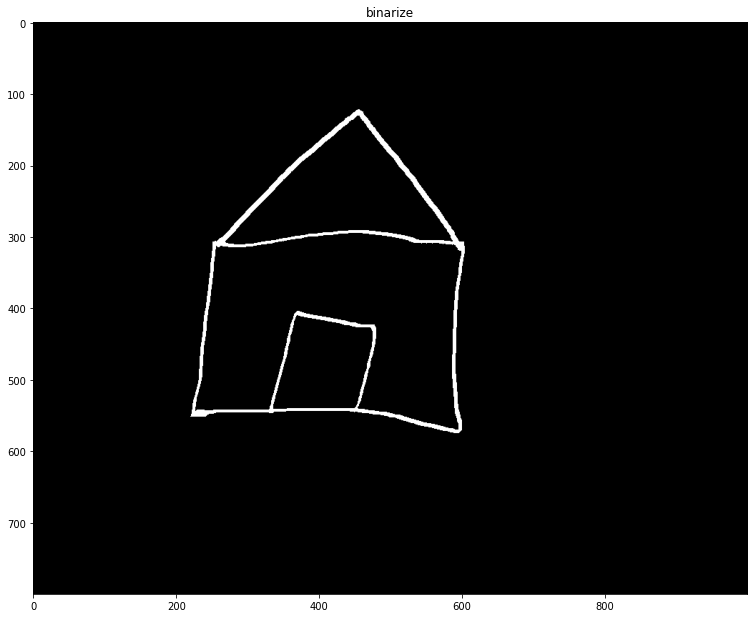

Number of contours found =  4


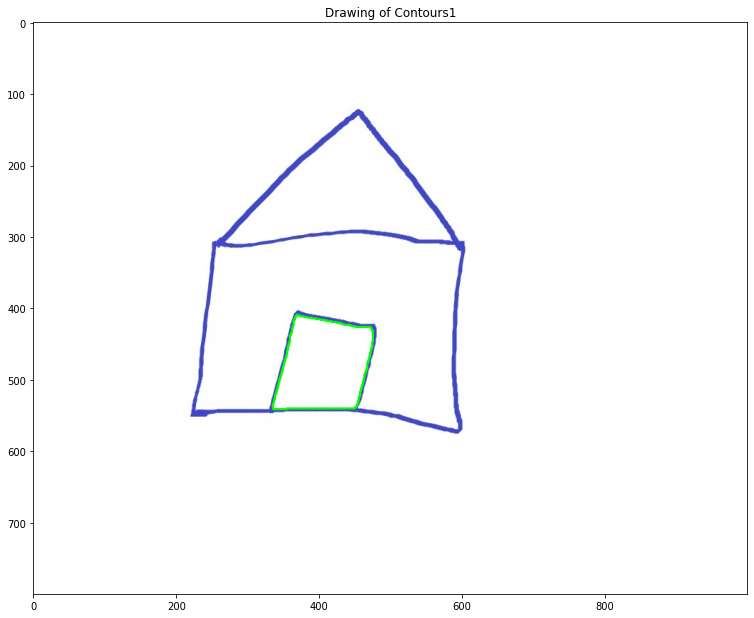

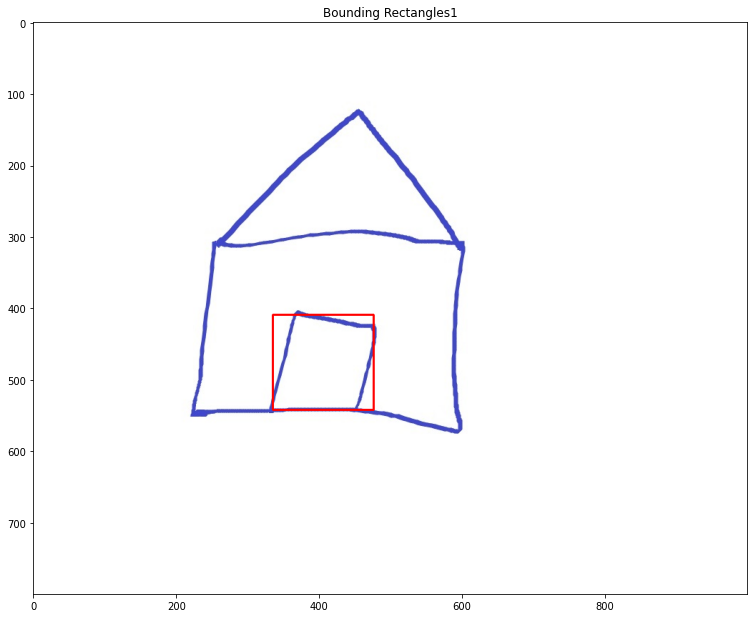

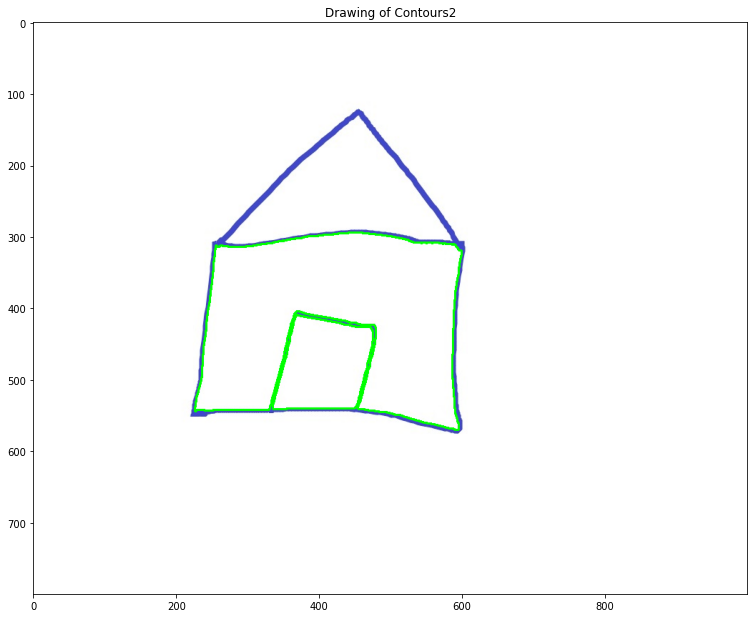

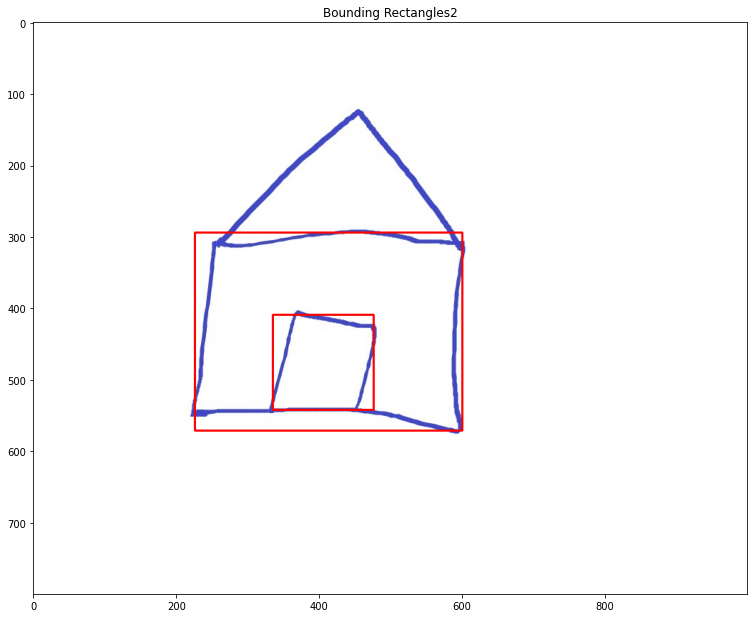

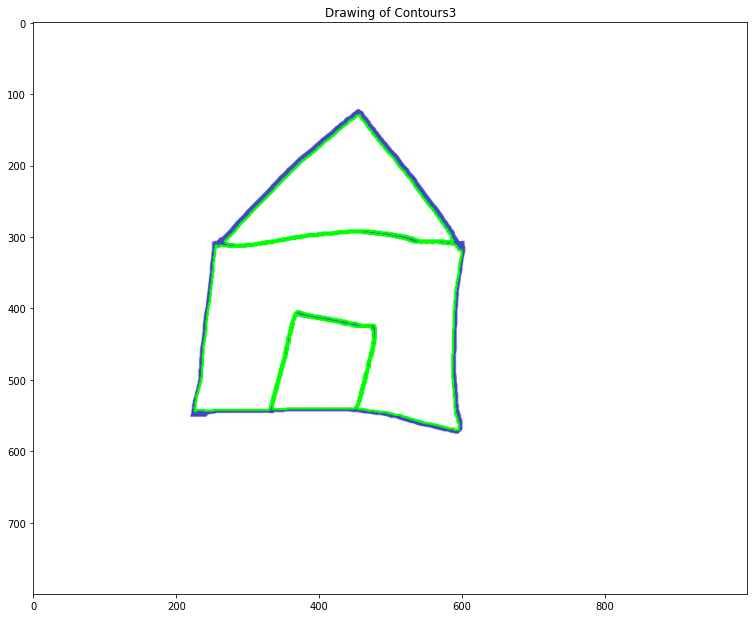

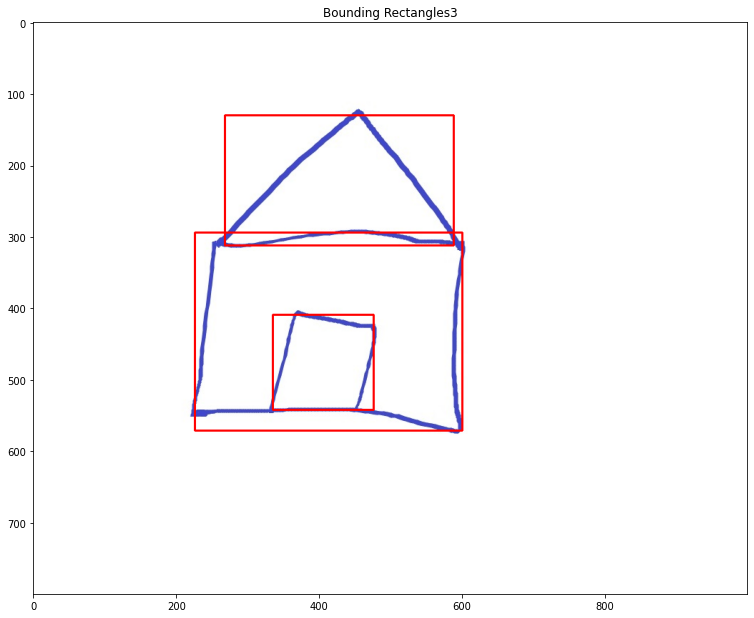

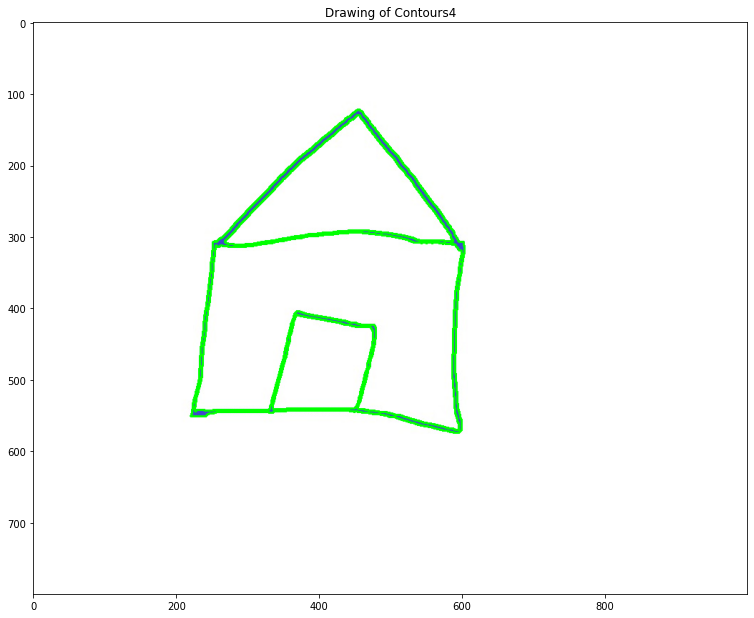

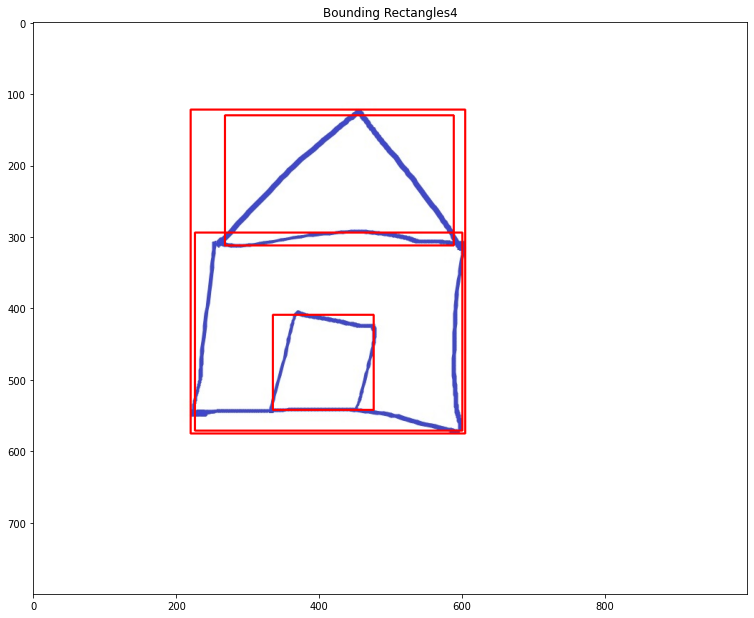

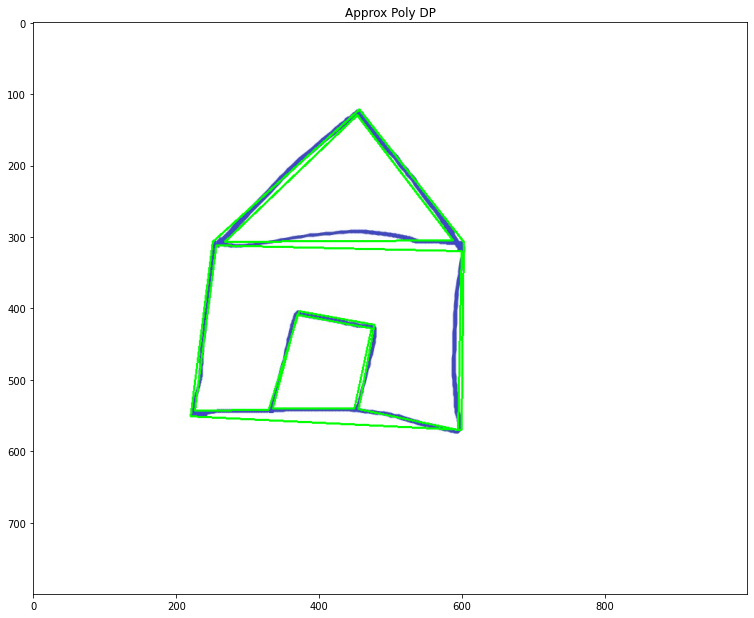

In [25]:
# 라이브러리 임포트
import numpy as np
import cv2

# 이미지 로드
image = cv2.imread('images/house.jpg')
orig_image = image.copy()
imshow('Original Image', orig_image)

# 회색으로 바꾸고 이진화하자 #다양한 이진화 방법이 존재
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
imshow('binarize', thresh)

# 이진화된 이미지를 사용하여 컨투어를 찾아보자
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()
# 컨투어의 개수는 몇개일까?
print("Number of contours found = ", len(contours))

#각각의 컨투어를 그려보고 '컨투어를 포함한 최소 사각형'을 그려보자
for i,c in enumerate(contours):
    x,y,w,h = cv2.boundingRect(c) #주어진 점을 감싸는 최소 크기 사각형(바운딩 박스)를 반환합니다.
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)
    imshow('Drawing of Contours' +str(i+1), image)
    imshow('Bounding Rectangles'+str(i+1), orig_image)


# 컨투어 그려보고 컨투어 포함하는 사각형 그려보고
# 이제는 '컨투어를 근사'시켜서 그려본다
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True) # 컨투어 길이를 반환한다.
    approx = cv2.approxPolyDP(c, accuracy, True) # 컨투어를 근사화한다.
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow('Approx Poly DP', copy)


## **Convex Hull**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/convex.png)

Convex Hull will look similar to contour approximation, but it is not (Both may provide the same results in some cases). 

The 'cv2.convexHull()' function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called c
onvexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours

cv2.convexHull() 함수를 이용해 평면상의 집합이 컨벡스 한지 확인한다.

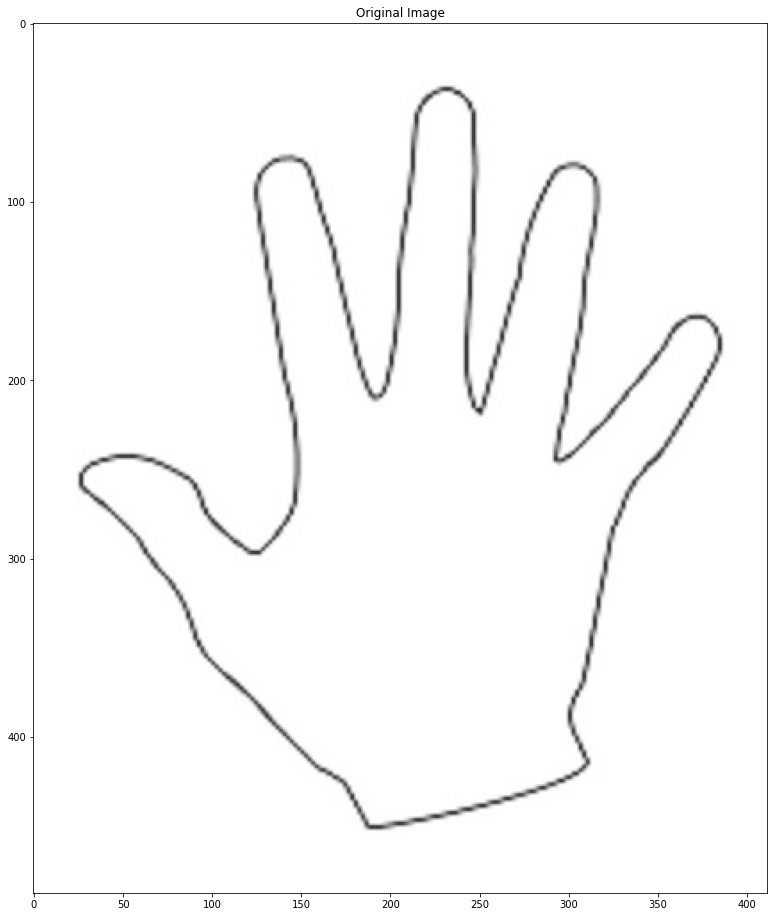

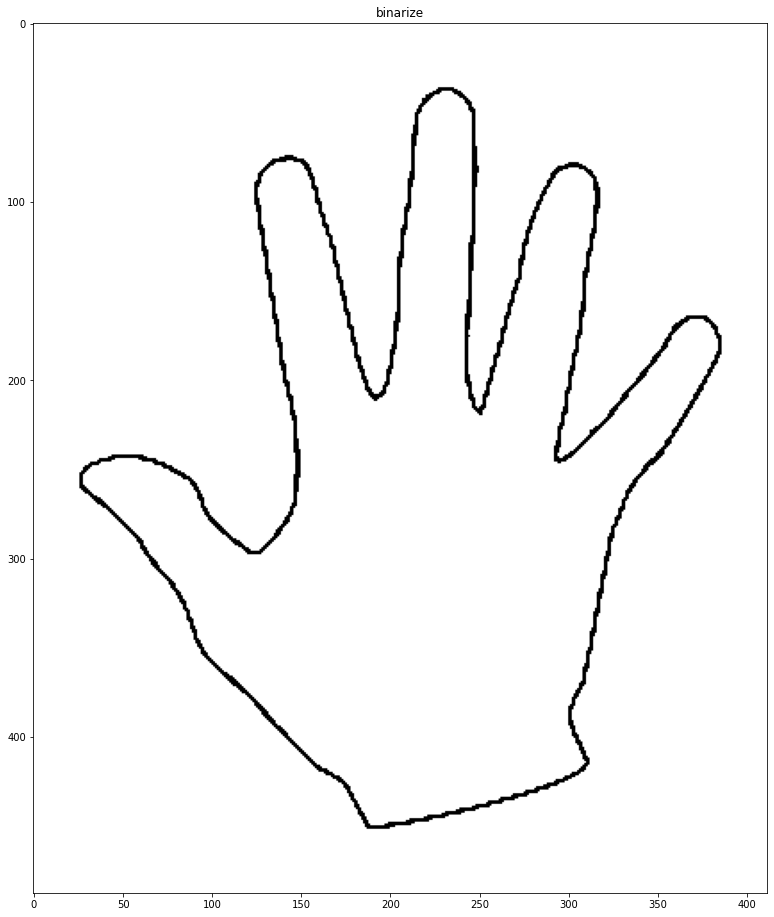

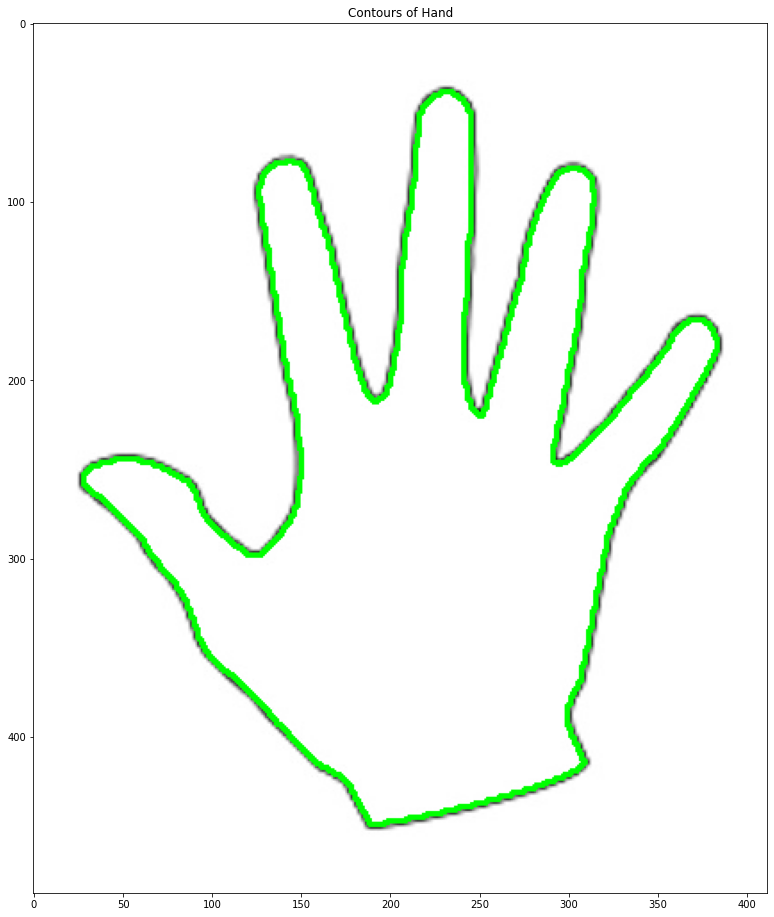

Number of contours found =  3


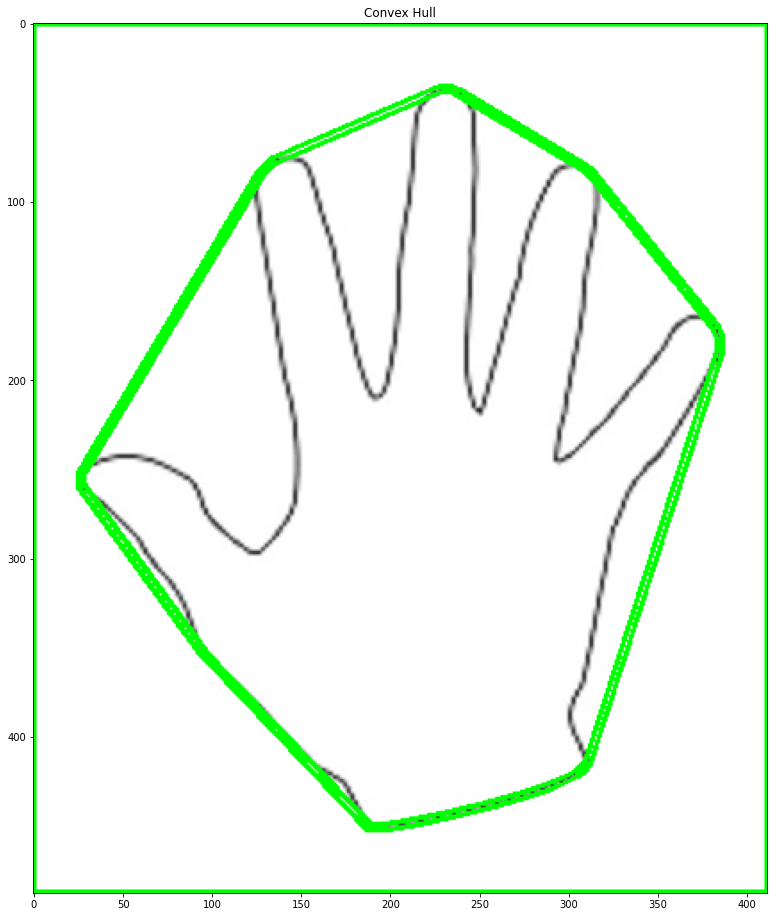

In [32]:
import numpy as np
import cv2
# 이미지를 가져오고 회색으로 바꾼다.
image = cv2.imread('images/hand.jpg')
orginal_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow('Original Image', image)

# 이미지의 tHreshold를 정해 이진화를 한다.
ret, thresh = cv2.threshold(gray, 176, 255, 0)
imshow('binarize', thresh)

# 컨투어를 찾자
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, 0, (0, 255, 0), 2) 
imshow('Contours of Hand', image)

print("Number of contours found = ", len(contours))
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
#contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(orginal_image, [hull], 0, (0, 255, 0), 2)
    
imshow('Convex Hull', orginal_image)

# **Matching Contours**
#### **cv2.matchShapes(contour template, contour, method, method parameter)**

**Output** – match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)


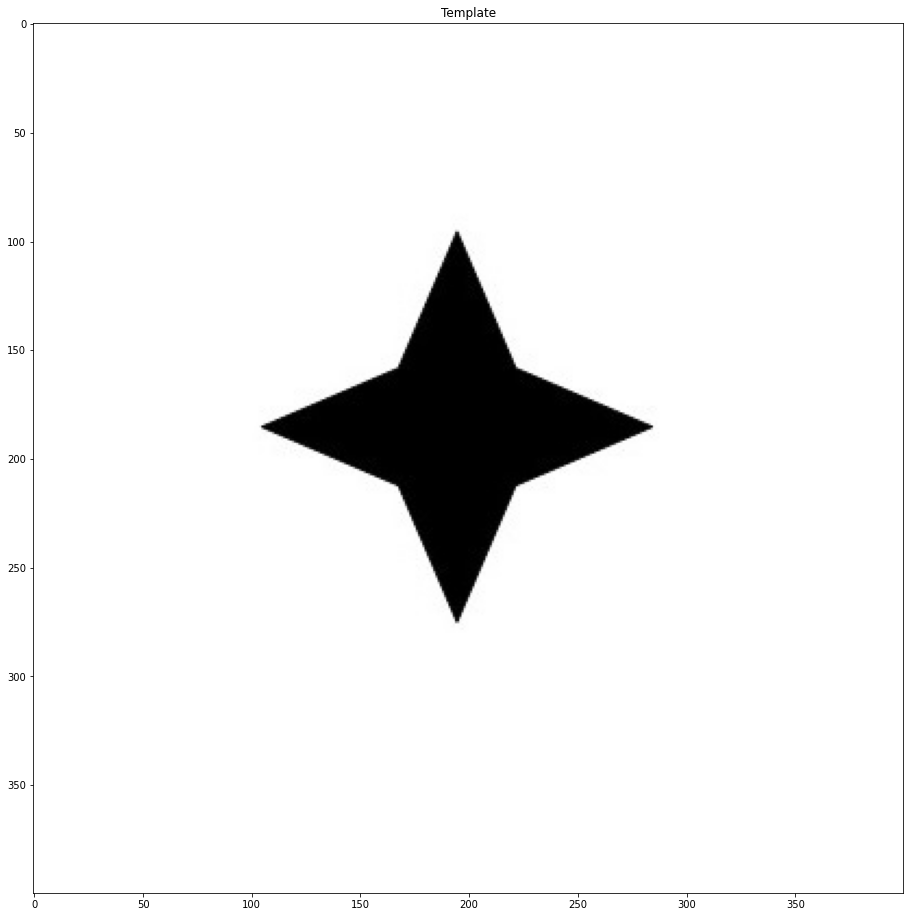

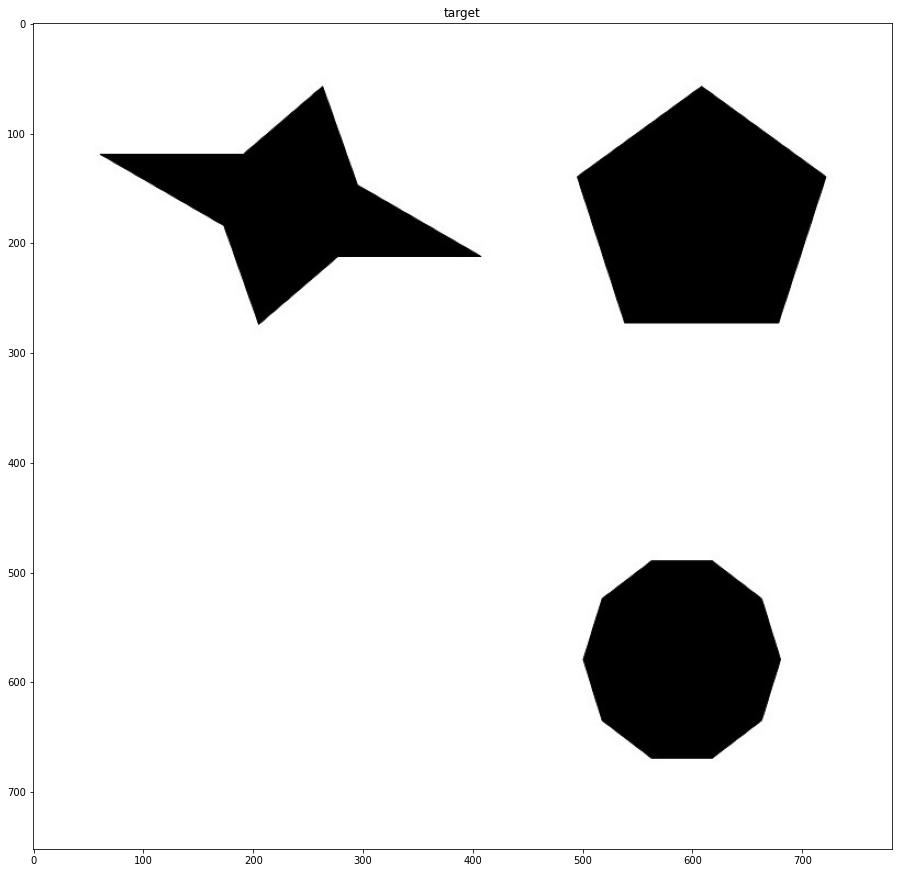

0.13081816783853514
0.15902005339788694
0.14987915682525596
0.07094034474475601


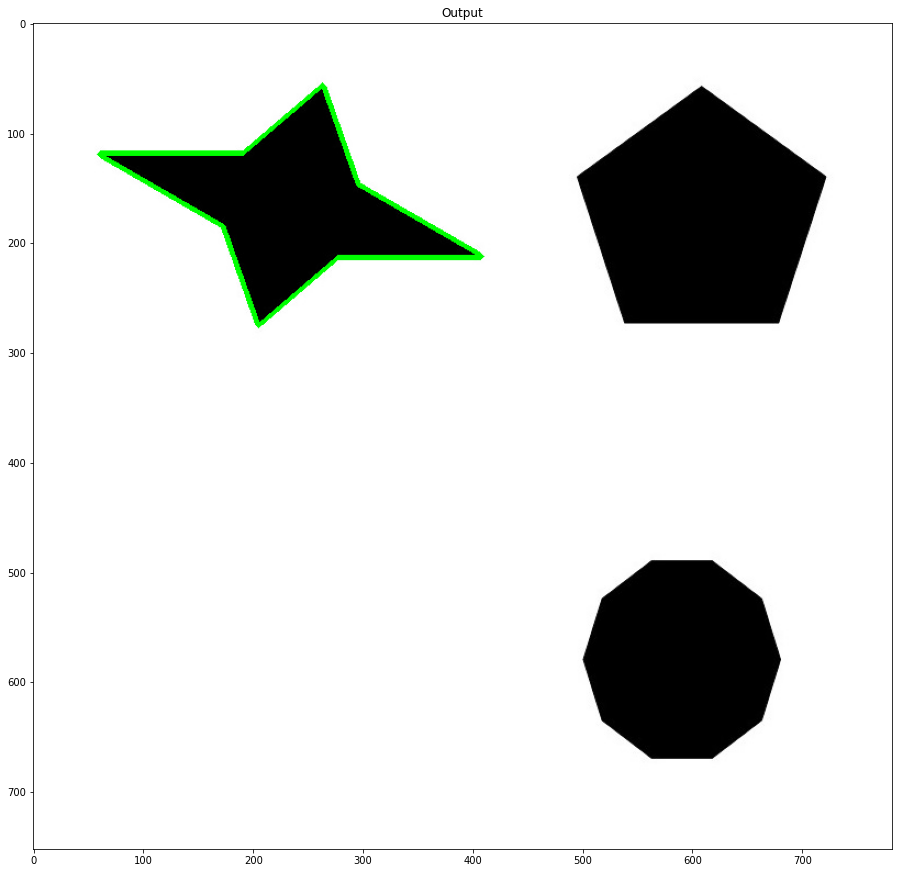

In [35]:
import cv2
import numpy as np

# 탬플릿 이미지 가져온다.
template = cv2.imread('images/4star.jpg',0)
imshow('Template', template)

# 타겟 이미지를 가져온다.(회색으로)
target = cv2.imread('images/shapestomatch.jpg')
imshow('target', target)
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# 가져온 이미지 모두 이진화를 해준다.
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# 탬플릿의 컨투어를 찾아준다.
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
# 컨투어의 영역이 큰순서 대로 분류해준다.(큰 것을 제거해주기 위해)
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
# 큰 컨투어는 제거하고 작은 컨투어를 사용한다.
template_contour = contours[1]

# 타겟 이미지에서도 컨투어를 찾아준다.
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# 타겟 컨투어를  매칭시키자
for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
          # cv2.matchShapes(contour1, contour2, method, parameter) ->  두 외곽선 사이의 거리 반환
    print(match)
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
imshow('Output', target)